In [54]:
import numpy as np
from scipy import stats as st
from matplotlib import pyplot as pyp
%matplotlib inline
def domain(array, trunc=True):
    if trunc:
        return [np.min(array), np.max(array)]
    return {'low': np.min(array), 'high': np.max(array)}
def nan_helper(dat):
    if not isinstance(dat,np.ndarray):
        dat = np.array(dat)
    return np.isnan(dat), lambda z: z.nonzero()[0]

In [76]:
data = np.random.normal(loc=0,scale=2,size=1000)
kdeFun = st.kde.gaussian_kde(data, bw_method='silverman')
h= np.histogram(data, density=True);
h = np.array(h)
h[0] = np.append(h[0],0)
yDomain = domain(h[0], trunc=False)
xDomain = domain(h[1], trunc=False)
print(yDomain,xDomain)
xUnif = np.random.uniform(**xDomain, size = 10000)
yUnif = np.random.uniform(**yDomain, size = 10000)
for x in range(xUnif.shape[-1]):
    yUnif[x] = yUnif[x] if yUnif[x] < kdeFun(xUnif[x]) else np.nan

    nans, fn = nan_helper(yUnif)
inds = fn(~nans)

{'low': 0.0, 'high': 0.19283600835922013} {'low': -6.0905551198438106, 'high': 5.8885354019682286}


In [66]:
inds = np.random.choice(fn(~nans),replace=False, size=1000);
ys = yUnif[inds]
xs = xUnif[inds]

{'low': 0.0, 'high': 0.2042267455531358} {'low': -5.6131733238785717, 'high': 5.8446795330636112}


[ 0.19111492]


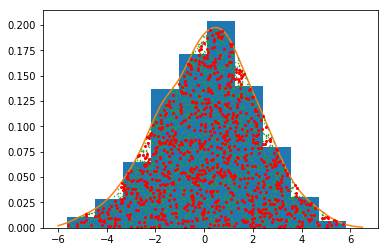

In [67]:
print(kdeFun(points=0))
pyp.hist(data, density=True);
pyp.plot(np.linspace(-6,6.5,1000),kdeFun(np.linspace(-6,6.5,1000)));
pyp.plot(xUnif,yUnif, marker = '.', markersize = 1, linestyle='none')
pyp.plot(xs,ys,marker='o', markersize = 2, color='red', linestyle='none')

In [85]:
inds


array([   1,    3,    6, ..., 9994, 9995, 9997], dtype=int64)